# T-Test - Leakage detection

In [26]:
import numpy as np
import random
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

import datasets

In [39]:
engines = [
    lascar.TTestEngine(
        name="key",
        partition_function=lambda value: int(value["key"][1] & 0x01 == 0),
    ),
    lascar.TTestEngine(
        name="random",
        partition_function=lambda value: random.randint(0, 1)
    ),
]

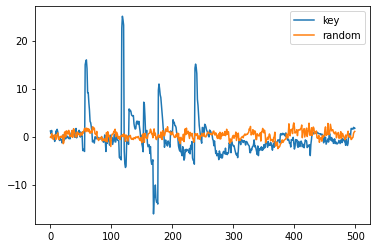

In [41]:
data = datasets.dataset("cw_sboxleaky_fixedinput")

trace = lascar.TraceBatchContainer(data['trace'], data)
session = lascar.Session(
    trace,
    engines=engines,
    output_method=lascar.MatPlotLibOutputMethod(*engines, single_plot=True, legend=True),
    progressbar=False,
)
session.run(batch_size=10_000, thread_on_update=False)